# 제 1유형 데이터 다루기

### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("mtcars.csv")
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### 1. data type

In [3]:
df.dtypes

car      object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [4]:
#데이터 타입 변경
df1 = df.copy()
df1 = df1.astype({'cyl':'object'})
print(df1.dtypes)

car      object
mpg     float64
cyl      object
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object


In [5]:
#데이터 타입 변경(2개 이상)
df1 = df1.astype({'cyl':'int', 'gear':'object'})
print(df1.dtypes)

car      object
mpg     float64
cyl       int32
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear     object
carb      int64
dtype: object


In [6]:
df1['cyl'].head(3)

0    6
1    6
2    4
Name: cyl, dtype: int32

In [7]:
df1['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

### 2. 기초 통계량

1) 중심측도를 나타내는 값

In [8]:
df = pd.read_csv("mtcars.csv")
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
df.shape

(32, 12)

In [10]:
#평균값 구하기
mpg_mean = df['mpg'].mean()

In [11]:
print(mpg_mean)

20.090625000000003


In [12]:
#중앙값 구하기
mpg_median = df['mpg'].median()

In [13]:
print(mpg_median)

19.2


In [14]:
#최빈값 구하기
mpg_mode = df['cyl'].mode()
print(mpg_mode)

0    8
Name: cyl, dtype: int64


In [15]:
mpg_mode[0]

8

In [16]:
df['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

2) 산포도를 나타내는 값

In [17]:
#분산
mpg_var = df['mpg'].var()

In [18]:
print(mpg_var)

36.32410282258064


In [19]:
#표준편차
mpg_std = df['mpg'].std()
print(mpg_std)

6.026948052089104


In [20]:
#IQR
Q1 = df['mpg'].quantile(0.25)
print(Q1)

15.425


In [21]:
Q3 = df['mpg'].quantile(0.75)
print(Q3)

22.8


In [22]:
IQR = Q3 - Q1
print(IQR)

7.375


In [23]:
Q2 = df['mpg'].quantile(0.50)
print(Q2)
print(df['mpg'].median())

19.2
19.2


In [24]:
#범위
mpg_max = df['mpg'].max()
print(mpg_max)

33.9


In [25]:
mpg_min = df['mpg'].min()
print(mpg_min)

10.4


In [26]:
mpg_range = mpg_max - mpg_min
print(mpg_range)

23.5


3) 분포의 비대칭도

In [27]:
#왜도
mpg_skew = df['mpg'].skew()
print(mpg_skew)

0.6723771376290805


In [28]:
#첨도 
mpg_kurt = df['mpg'].kurt()
print(mpg_kurt)

-0.0220062914240855


4) 기타

In [29]:
mpg_sum = df['mpg'].sum()
print(mpg_sum)

642.9000000000001


In [30]:
#절대값
IQR2 = Q1 - Q3
print(IQR2)
print(abs(IQR2))

-7.375
7.375


In [31]:
#데이터 수
len(df['mpg'])

32

5) 그룹화하여 계산

In [32]:
import seaborn as sns
df = sns.load_dataset('iris')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [33]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [34]:
df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


### 3. 데이터 인덱싱, 필터링, 정렬, 변경 등

In [35]:
df = pd.read_csv("mtcars.csv")
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [36]:
# 행/열 인덱싱 : df.loc['행', '열']
df.loc[3, 'mpg']

21.4

In [37]:
# 열만 인덱싱
df.loc[:, 'mpg'].head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [38]:
df.loc[0:3, ['mpg','cyl','disp'] ]

,mpg,cyl,disp
0,21.0,6,160.0
1,21.0,6,160.0
2,22.8,4,108.0
3,21.4,6,258.0


In [39]:
df.loc[0:3, 'mpg':'disp']

,mpg,cyl,disp
0,21.0,6,160.0
1,21.0,6,160.0
2,22.8,4,108.0
3,21.4,6,258.0


In [40]:
# 앞에서 n행 인덱싱
df.head(3)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [41]:
# 뒤에서 n행 인덱싱
df.tail(5)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [42]:
# 열 선택
df_cyl = df['cyl'] # df.cyl
df_cyl.head(3)

0    6
1    6
2    4
Name: cyl, dtype: int64

In [43]:
df['cyl'].head(3)

0    6
1    6
2    4
Name: cyl, dtype: int64

In [44]:
df.cyl.head(3)

0    6
1    6
2    4
Name: cyl, dtype: int64

In [45]:
df_new = df[['cyl', 'mpg']]
df_new.head()

,cyl,mpg
0,6,21.0
1,6,21.0
2,4,22.8
3,6,21.4
4,8,18.7


In [46]:
#열 제거
df.drop(columns=['car','mpg','cyl']).head()

,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,160.0,110,3.90,2.620,16.46,0,1,4,4
1,160.0,110,3.90,2.875,17.02,0,1,4,4
2,108.0,93,3.85,2.320,18.61,1,1,4,1
3,258.0,110,3.08,3.215,19.44,1,0,3,1
4,360.0,175,3.15,3.440,17.02,0,0,3,2


In [47]:
# 열 추가
df2 = df.copy() # 이렇게 복사해야함 (df2 = df 복사는 df가 바뀌면 df2도 바뀜)
df2['new'] = df['mpg'] + 10
df2.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,new
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,31.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,31.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,32.8
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,31.4
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,28.7


In [48]:
# 1개 조건 필터링
# cyl=4 인 데이터의 수
cond1 = (df['cyl']==4)
len(df[cond1])
# cyl_4 = df[ df['cyl']==4 ]
# print(len(cyl_4))

11

In [49]:
# mpg 가 22 이상인 데이터 수
cond2 = (df['mpg']>= 22)
print(len(df[cond2]))

9


In [50]:
len(df[df['mpg'] >= 22])

9

In [51]:
df[cond1 & cond2]

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


In [52]:
len(df[cond1 & cond2])

9

In [53]:
df[cond1 | cond2]

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


In [54]:
# 한번에 코딩할 경우
print(len(df[ (df['cyl']==4) & (df['mpg']>= 22)] ))
print(len(df[ (df['cyl']==4) | (df['mpg']>= 22)] ))

9
11


In [55]:
df.sort_values('mpg', ascending=False).head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


In [56]:
df.sort_values('mpg', ascending=True).head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [57]:
import numpy as np
df = pd.read_csv("mtcars.csv")
# np.where 활용
# hp 변수 값중에서 205가 넘는 값은 205로 처리하고 나머지는 그대로 유지
df['hp'] = np.where(df['hp']>=205, 205, df['hp']) # np.where(조건, 조건 충족시, 조건 불충족시)
# 내림차순 정렬 (위에서부터 내려간다)
df.sort_values('hp', ascending=False).head(10)
# 활용 : 이상치를 Max 값이나 Min 값으로 대체할 경우 조건문 활용

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
16,Chrysler Imperial,14.7,8,440.0,205,3.23,5.345,17.42,0,0,3,4
30,Maserati Bora,15.0,8,301.0,205,3.54,3.570,14.60,0,1,5,8
28,Ford Pantera L,15.8,8,351.0,205,4.22,3.170,14.50,0,1,5,4
6,Duster 360,14.3,8,360.0,205,3.21,3.570,15.84,0,0,3,4
23,Camaro Z28,13.3,8,350.0,205,3.73,3.840,15.41,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,205,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3


In [58]:
help(np.where)

Help on function where in module numpy:

where(...)
    where(condition, [x, y], /)
    
    Return elements chosen from `x` or `y` depending on `condition`.
    
    .. note::
        When only `condition` is provided, this function is a shorthand for
        ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
        preferred, as it behaves correctly for subclasses. The rest of this
        documentation covers only the case where all three arguments are
        provided.
    
    Parameters
    ----------
    condition : array_like, bool
        Where True, yield `x`, otherwise yield `y`.
    x, y : array_like
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray
        An array with elements from `x` where `condition` is True, and elements
        from `y` elsewhere.
    
    See Also
    --------
    choose
    nonzero : The function that is called when x an

### 4. 결측치, 이상치, 중복값 처리 (제거 of 대체)

종속변수(y) : 생존여부(0 사망, 1 생존)

독립변수(x) : pclass,sex,age 등의 탑승자 정보(변수)

In [59]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [60]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [61]:
df.shape

(891, 15)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [63]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [65]:
#결측치 제거
print(df.dropna(axis=0).shape) #행 기준, default
print(df.dropna(axis=1).shape) #열 기준

(182, 15)
(891, 11)


In [66]:
#결측치 대체
#데이터 복사
df2 = df.copy 
df2 = pd.DataFrame(df)

In [67]:
# 1. 중앙값/평균값 등으로 대체
# 먼저 중앙값을 구합니다.
median_age = df2['age'].median()
print(median_age)

28.0


In [69]:
# 구한 중앙값으로 결측치를 대체합니다.
df2['age'] = df['age'].fillna(median_age)

In [70]:
# 결측치가 잘 대체되었는지 확인합니다.
df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [71]:
print(df['age'].mean())
print(df2['age'].mean())

29.69911764705882
29.36158249158249


<Axes: ylabel='age'>

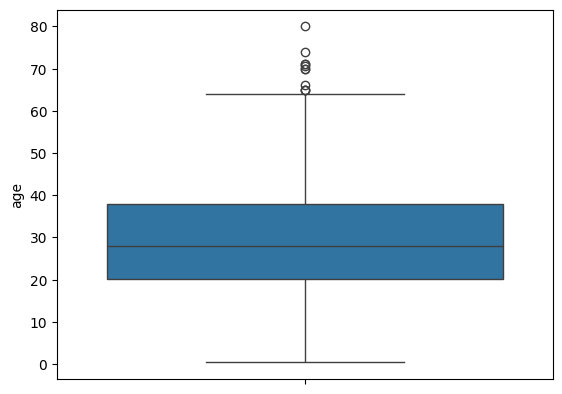

In [72]:
# 타이타닉 데이터 불러오기
df = sns.load_dataset('titanic')
# (참고) 상자그림
sns.boxplot(df['age'])

In [73]:
# Q1, Q3, IQR 구하기
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
print(Q1, Q3, IQR)

20.125 38.0 17.875


In [74]:
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(upper, lower)

64.8125 -6.6875


In [75]:
# 문제 : age 변수의 이상치를 제외한 데이터 수는? (상자그림 기준)
cond1 = (df['age']<=upper) # 부호주의
cond2 = (df['age']>=lower) # 부호주의
print(len(df[cond1 & cond2]))
print(len(df[cond1]))
print(len(df))

703
703
891


In [76]:
# 문제 : age 변수의 이상치를 제외한 데이터셋 확인(상자그림 기준)
df_new = df[cond1 & cond2]
df_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [78]:
# 표준정규분포 활용
mean_age = df['age'].mean()
std_age = df['age'].std()
print(mean_age)
print(std_age)

29.69911764705882
14.526497332334042


In [79]:
znorm = (df['age']-mean_age) / std_age
znorm

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: age, Length: 891, dtype: float64

In [80]:
#문제 : 이상치의 개수는 몇개인가? (:±3Z 기준)
cond1 = (znorm > 3)
len(df[cond1])

2

In [81]:
cond2 = (znorm < -3)
len(df[cond2])

0

In [82]:
print(len(df[cond1]) + len(df[cond2]))

2


In [83]:
# 데이터 불러오기
df = sns.load_dataset('titanic')

In [84]:
df.shape

(891, 15)

In [85]:
df1 = df.copy()
df1 = df1.drop_duplicates()
print(df1.shape)

(784, 15)


### 5. 데이터 scaling (데이터 표준화, 정규화)

In [86]:
#데이터 표준화
df = pd.read_csv("mtcars.csv")
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [88]:
from sklearn.preprocessing import StandardScaler
zscaler = StandardScaler()
df['mpg'] = zscaler.fit_transform(df[['mpg']])
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.153299,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,0.153299,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,0.456737,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,0.220730,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,-0.234427,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [89]:
# 확인
print(df['mpg'].mean(), df['mpg'].std())

-4.996003610813204e-16 1.016001016001524


In [90]:
#데이터 정규화 (min-max)
df = pd.read_csv("mtcars.csv")

from sklearn.preprocessing import MinMaxScaler
mscaler = MinMaxScaler()
df['mpg'] = mscaler.fit_transform(df[['mpg']])
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.451064,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,0.451064,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,0.527660,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,0.468085,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,0.353191,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [91]:
print(df['mpg'].min(), df['mpg'].max())

0.0 1.0


### 6. 데이터 합치기 

In [92]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [93]:
# 데이터 2개로 분리
df1 = df.loc[0:30, ] # 0~30행 데이터
df2 = df.loc[31:60, ] # 31~60행 데이터

In [94]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [95]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
31,5.4,3.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa


In [96]:
df_sum = pd.concat([df1, df2], axis=0) # 행 방향으로 결합 (위, 아래)
print(df_sum.head())
print(df_sum.shape)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(61, 5)


In [97]:
# 데이터 2개로 나누기
df1 = df.loc[: , 'sepal_length':'petal_length'] # 1~3열 추출 데이터
df2 = df.loc[: , ['petal_width','species'] ] # 4~5열 데이터

In [98]:
df_sum = pd.concat([df1, df2], axis=1) # 열 방향으로 결합 (좌, 우)
df_sum.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 7. 날짜/시간 데이터, index 다루기

In [99]:
# 데이터 만들기
df = pd.DataFrame( {
'날짜': ['20230105','20230105','20230223','20230223','20230312','20230422','20230511'],
'물품' : ['A', 'B', 'A', 'B', 'A', 'B', 'A'],
'판매수': [5, 10, 15, 15, 20, 25, 40],
'개당수익': [500, 600, 500, 600, 600, 700, 600] })

df

,날짜,물품,판매수,개당수익
0,20230105,A,5,500
1,20230105,B,10,600
2,20230223,A,15,500
3,20230223,B,15,600
4,20230312,A,20,600
5,20230422,B,25,700
6,20230511,A,40,600


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      7 non-null      object
 1   물품      7 non-null      object
 2   판매수     7 non-null      int64 
 3   개당수익    7 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [101]:
df['날짜'] = pd.to_datetime(df['날짜'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      7 non-null      datetime64[ns]
 1   물품      7 non-null      object        
 2   판매수     7 non-null      int64         
 3   개당수익    7 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 352.0+ bytes


In [103]:
# 년,월,일 변수(열) 추가하기
df['year'] = df['날짜'].dt.year
df['month'] = df['날짜'].dt.month
df['day'] = df['날짜'].dt.day
df

,날짜,물품,판매수,개당수익,year,month,day
0,2023-01-05,A,5,500,2023,1,5
1,2023-01-05,B,10,600,2023,1,5
2,2023-02-23,A,15,500,2023,2,23
3,2023-02-23,B,15,600,2023,2,23
4,2023-03-12,A,20,600,2023,3,12
5,2023-04-22,B,25,700,2023,4,22
6,2023-05-11,A,40,600,2023,5,11


In [104]:
# 날짜 구간 필터링
df [df['날짜'].between('2023-01-01', '2023-02-23')] # 좌우 모두포함

,날짜,물품,판매수,개당수익,year,month,day
0,2023-01-05,A,5,500,2023,1,5
1,2023-01-05,B,10,600,2023,1,5
2,2023-02-23,A,15,500,2023,2,23
3,2023-02-23,B,15,600,2023,2,23


In [105]:
# 날짜를 인덱스로 설정후 loc 함수 사용
# 데이터 만들기
df = pd.DataFrame( {
'날짜': ['20230105','20230105','20230223','20230223','20230312','20230422','20230511'],
'물품' : ['A', 'B', 'A', 'B', 'A', 'B', 'A'],
'판매수': [5, 10, 15, 15, 20, 25, 40],
'개당수익': [500, 600, 500, 600, 600, 700, 600] })
# 데이터 타입 datetime 으로 변경(필수)
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.set_index('날짜') # drop=True(디폴트) or False
df.head()

,물품,판매수,개당수익
날짜,,,
2023-01-05,A,5,500
2023-01-05,B,10,600
2023-02-23,A,15,500
2023-02-23,B,15,600
2023-03-12,A,20,600


In [106]:
print(df.loc['2023-01-05':'2023-02-23']) # 둘다 기간 포함
print(df.loc[ (df.index>='2023-01-05') & (df.index<='2023-02-23')])

           물품  판매수  개당수익
날짜                      
2023-01-05  A    5   500
2023-01-05  B   10   600
2023-02-23  A   15   500
2023-02-23  B   15   600
           물품  판매수  개당수익
날짜                      
2023-01-05  A    5   500
2023-01-05  B   10   600
2023-02-23  A   15   500
2023-02-23  B   15   600


In [107]:
# 시간 다루기

# 시간 데이터 만들기(수정금지)
df = pd.DataFrame( {
'물품' : ['A', 'B', 'A', 'B', 'A', 'B', 'A'],
'판매수': [5, 10, 15, 15, 20, 25, 40],
'개당수익': [500, 600, 500, 600, 600, 700, 600] })
time = pd.date_range('2023-09-24 12:25:00','2023-09-25 14:45:30', periods= 7)
df['time']=time
df = df[ ['time','물품','판매수','개당수익']]
df

,time,물품,판매수,개당수익
0,2023-09-24 12:25:00,A,5,500
1,2023-09-24 16:48:25,B,10,600
2,2023-09-24 21:11:50,A,15,500
3,2023-09-25 01:35:15,B,15,600
4,2023-09-25 05:58:40,A,20,600
5,2023-09-25 10:22:05,B,25,700
6,2023-09-25 14:45:30,A,40,600


In [108]:
df = pd.DataFrame( {
'물품' : ['A', 'B', 'A', 'B', 'A', 'B', 'A'],
'판매수': [5, 10, 15, 15, 20, 25, 40],
'개당수익': [500, 600, 500, 600, 600, 700, 600] })
time = pd.date_range('2023-09-24 12:25:00','2023-09-25 14:45:30', periods= 7)
df['time']=time
df = df[ ['time','물품','판매수','개당수익']]
# -------------------------------------------
# 1. 시간이 "변수"로 있을 경우 (between 함수)
df = df[ df['time'].between('2023-09-24 12:25:00', '2023-09-24 21:11:50') ]

In [109]:
df

,time,물품,판매수,개당수익
0,2023-09-24 12:25:00,A,5,500
1,2023-09-24 16:48:25,B,10,600
2,2023-09-24 21:11:50,A,15,500


In [110]:
df = pd.DataFrame( {
'물품' : ['A', 'B', 'A', 'B', 'A', 'B', 'A'],
'판매수': [5, 10, 15, 15, 20, 25, 40],
'개당수익': [500, 600, 500, 600, 600, 700, 600] })
time = pd.date_range('2023-09-24 12:25:00','2023-09-25 14:45:30', periods= 7)
df['time']=time
df = df[ ['time','물품','판매수','개당수익']]
# -------------------------------------------
# 2. 시간이 "index" 로 있을 경우(between_time, loc 함수)
# 1) df.between_time(start_time='00:00:00',end_time='00:00:00')
# ★날짜와 상관없이 특정 시간대를 필터링 해야할 때
# (★주의:시간이 index에 위치해야 함)
# index 새로 지정
df = df.set_index('time')

df = df.between_time(start_time='12:25:00',end_time='21:11:50') # 시간 시작,끝 모두 포함
# include_start=False, include_end=False 옵션으로 시작, 끝 시간 제외 가능
print(df)

                    물품  판매수  개당수익
time                             
2023-09-24 12:25:00  A    5   500
2023-09-24 16:48:25  B   10   600
2023-09-24 21:11:50  A   15   500
2023-09-25 14:45:30  A   40   600


In [111]:
#2) loc 함수 (시간이 index에 위치해야 함)
print(df.loc['2023-09-24 12:25:00':'2023-09-24 21:11:50']) # 둘다 포함
print(df.loc[ (df.index >= '2023-09-24 12:25:00') & (df.index<='2023-09-24 21:11:50')])

                    물품  판매수  개당수익
time                             
2023-09-24 12:25:00  A    5   500
2023-09-24 16:48:25  B   10   600
2023-09-24 21:11:50  A   15   500
                    물품  판매수  개당수익
time                             
2023-09-24 12:25:00  A    5   500
2023-09-24 16:48:25  B   10   600
2023-09-24 21:11:50  A   15   500
